# Regression, overfitting, and cross-validation

Today we'll start our exploration of regression, focusing first on linear regression and ordinary least squares.  As we'll talk about in the lecture portion, we seek to estimate the relationship between a predictor or set of predictors and a predictand or response variable.  In doing so we will need to make judgements about the nature of this relationship and estimate the parameters or coefficients of a model that links the variables to one another.

This notebook will walk us through some of the very basics of fitting (or training or calibrating) a linear regression model and doing some simple evaluation of the quality of our model.  We'll then introduce a few complications in the case where we have multiple potential predictors.  Finally, we'll introduce the concept of cross-validation. 

Let's get Numpy and Matplotlib first:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
# plt.rcParams['font.family'] = 'Helvetica'

In this notebook we are going to make use of the `scikit-learn` library.  Scikit-learn is broadly for machine learning, with regression being just one approach to machine learning.  Scikit-learn is not the only way to do regression in Python, of course.  Later will look at other options.  

The documentation for scikit-learn can be found here: https://scikit-learn.org/stable/

We'll specifically be using Linear Regression with in the `linear_model` module.

Documentation for linear models is here: https://scikit-learn.org/stable/modules/linear_model.html

First, let's import what we need from scikit-learn.  We'll bring in `LinearRegression` from the `linear_model` module and then we'll get some metrics from the [`sklearn.metrics` module](sklearn.metrics).  Metrics are available for not only linear regression, but many other methods used in scikit-learn.  

In [7]:
!pip install scikit-learn -U

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.0 MB 787.7 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.0 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.0 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.0 MB 1.6 MB/s eta 0:00:07
   - -----------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mayae\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
from sklearn.linear_model import LinearRegression # the LinearRegression method from the linear_models module
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score # three different metrics we'll use to evaluate our model

Let's first create two series of data, X and Y.  X will be the independent predictor variable, and Y will be the outcome or response or predictand variable that is dependent on X.

In [3]:
# First let's generate some synthetic data for the first simple example
np.random.seed(1999) # once again, let Prince guide us to all getting the same answer in lecture - you can change this for your purposes whenever you want, however
n_samples = 128 

# create the independent variable as a random draw from the uniform distribution [0,1]
X = 2 * np.random.rand(n_samples, 1)

# create a little bit of random normal noise
noise = np.random.randn(n_samples, 1) * 0.5 

# set the beta parameters slope and intercept 
intercept = 4
slope = 3

# create the dependent variable 
y = intercept + (slope * X) + noise  


We'll now use `LinearRegression` to fit a model relating Y to X.  In scikit-learn, this process has several steps:

1. Create the model - this doesn't do anything with the data yet, but rather creates a LinearRegression object
2. We then call `model.fit`, which estimates the model coefficients between the predictors (X) and the predictand (y). You can see how `LinearRegression` works [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).
3. We will them predict the values of y from X.  This uses the model fit from the previous step.

In [4]:

# now, use scikit-learn's linear regression - first we create the model and assign it to 'model' ... 
model = LinearRegression()

# then we use that model to fit the relationship between x and y
model.fit(X, y)

# then, we use this fit to predict y from x
y_pred = model.predict(X)


At this stage, we can evaluate some of the metrics for our model.  We'll specifically look at $R^2$, the Mean Squared Error (MSE), and the Root Mean Squared Error (RMSE):

In [5]:
# use scikit-learn again to calculate the regression statistics or diagnostics
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)

# Display those statistics
print(f"R²: {r_squared:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.9203
MSE: 0.2628
RMSE: 0.5126


As we'll discuss (briefly) in class, these metrics indicate a model that accounts for most of the variability in the predictand and has relatively small errors. 

Now, let's create a figure to evaluate the fit of our regression model, as well as to look at some of the assumptions of Ordinary Least Squares we looked at in class:

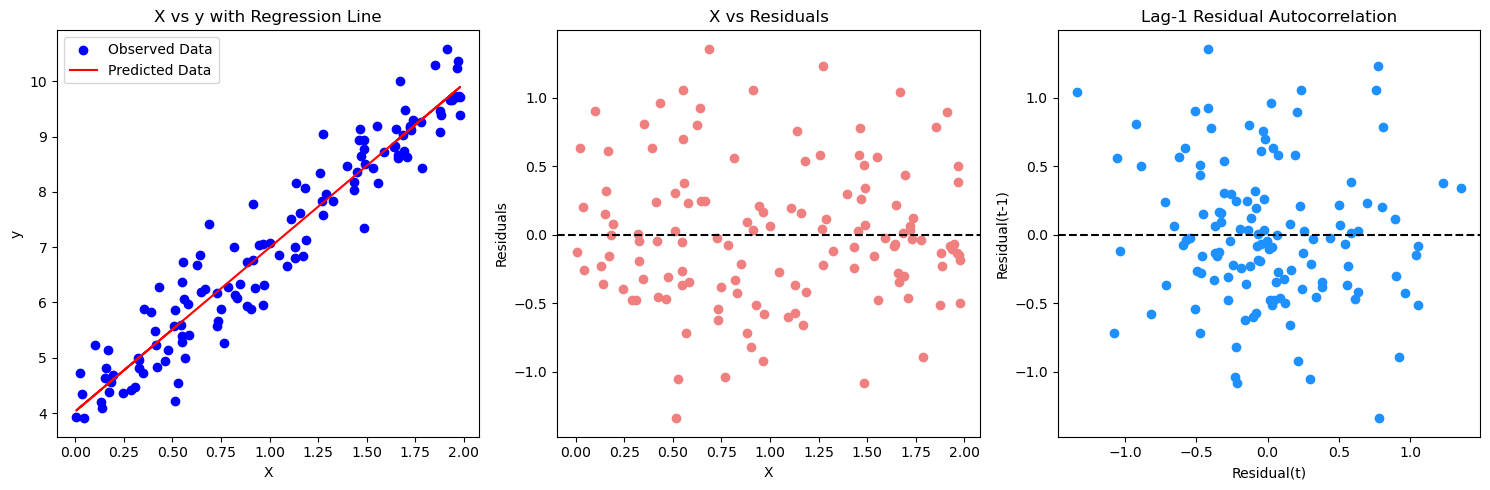

In [6]:
# Create a figure for our diagnostic plots ... 
plt.figure(figsize=(15, 5))

# first subplot is just the variables and the fit from the model
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, y_pred, color='red', label='Predicted Data')
plt.title('X vs y with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# second plot is the predictor vs. the residuals (e.g. is the relationship between the predictor and errors in our model?)
residuals = y - y_pred

plt.subplot(1, 3, 2)
plt.scatter(X, residuals, color='lightcoral')
plt.axhline(0, color='black', linestyle='--')
plt.title('X vs Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')

# third plot is the lagged correlation of the residuals with themselves - is there a relationship between the errors? 
residuals_shifted = np.roll(residuals, 1)

plt.subplot(1, 3, 3)
plt.scatter(residuals[1:], residuals_shifted[1:], color='dodgerblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lag-1 Residual Autocorrelation')
plt.ylabel('Residual(t-1)')
plt.xlabel('Residual(t)')

plt.tight_layout()
plt.show()


The plots above show that our model fits the data well, that there is no detectable relationship between the predictors and the residuals of the model fit, and that the residuals do not have a trend or any significant autocorrelation.  This looks like a good model with a high $R^2$ and relatively small errors. 

As you can see, this is a relatively simple system.  We can look at the coefficient (in this case, just the slope) by calling the following:

In [7]:
print(model.coef_) # the coefficient(s) of the model
print(model.intercept_) # the intercept of the model

[[2.96071282]]
[4.03229438]


Looking at these, you see they are quite close to the slope (3) and intercept (4) we specified when we created these data.

## Multiple predictors and the limitations of $R^2$

Let's now consider a system with multiple predictors.  We are accustomed to thinking of $R^2$ as a regression metrics that tells us, essentially, 'how much of the variability in the response variable can be explained by the predictors?'.   But $R^2$ has some important limitations.  One of these is that as you add additional predictors to a multiple linear regression equation, $R^2$ will continue to increase (even if just marginally) with each predictor, even if the predictor has no relationship to the predictand!

To guard against this, we introduce an adjusted $R^2$ statistic, which penalizes the $R^2$ calculation for each additional predictor.  

$
R^2_{\text{adj}} = 1 - \left( \frac{1 - R^2}{n - 1} \right) \times (n - p - 1)
$

where $n$ is the number of observations in our datasets and p is the number of predictors in the regression model. 

First, let's create 8 predictors $X$ - 3 we'll use to then create the predictand $y$ and the other will have no relationship to $y$

In [8]:
# This time we're going to generate the synthetic data with 8 predictors, some with strong relationships to Y, others with none at all 

# Create the 8 independent variables (X1, X2, ..., X8)
X1 = 3 * np.random.rand(n_samples, 1)  # Strong relationship
X2 = 2 * np.random.rand(n_samples, 1)  # Strong relationship
X3 = np.random.rand(n_samples, 1)      # this will be a weak relationship
X4 = np.random.randn(n_samples, 1)     # No relationship (noise)
X5 = np.random.randn(n_samples, 1)     # No relationship (noise)
X6 = np.random.randn(n_samples, 1)     # No relationship (noise)
X7 = np.random.randn(n_samples, 1)     # No relationship (noise)
X8 = np.random.randn(n_samples, 1)     # No relationship (noise)

# Create the dependent variable Y using only 3 predictors 
noise = np.random.randn(n_samples, 1) * 3
y = 4 + (3 * X1) + (2 * X2) + (0.5 * X3) + noise  # Y depends on just on X1, X2, and X3 plus the magnitide of the noise


Let's create a function for the adjusted $R^2$ now:

In [9]:
# Define a function to calculate the adjusted r2 term, which penalizes the model for the number of predictors
def adjusted_r2(r2, n, p): # takes the r2 score, the number of observations, and the number of predictors
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))


Now let's do our linear regression again.  We'll cycle through 8 times, each time allowing one more predictor to end the linear regression equation:

$
Y = \hat{\beta_{0}} + \hat{\beta_{1}}X_{1} + \hat{\beta_{2}}X_{2} ... + \hat{\beta_{k}}X_{k}
$

up to $k=8$.  But remember that predictors 4 through 8 are just noise.  We'll calculate the $R^2$ and adjusted $R^2$ to see how the penalty for extra predictors affects our assessment of the model:

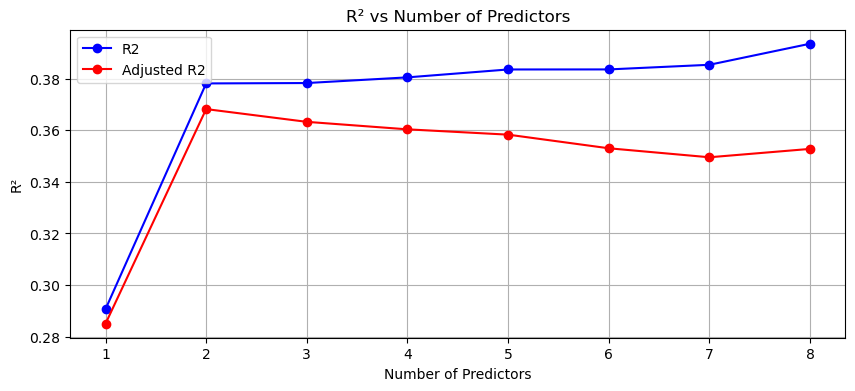

In [10]:
# We will now iteratively (and sequentially in for now) add predictors and fit the OLS regression models, while keeping track of how r2 and the adjusted r2 change with each additional predictor
X_full = np.hstack([X1, X2, X3, X4, X5, X6, X7, X8]) # horizontally stack all 8 predictors
r2_values = [] # make an empty list to receive and append r2 values
adjusted_r2_values = []  # make empty list to receive and append adjusted r2 values

n_predictors = np.arange(1, 9) # we'll use this below for plotting the step-by-step metrics

# now, loop through and use one more predictor each time 
for i in range(1, 9):
    X_subset = X_full[:, :i]  # on each loop use the first i predictors from the matrix X_full
    model = LinearRegression() # create the model
    model.fit(X_subset, y) # then fit the model
    y_pred = model.predict(X_subset) # then predict y from the subset of X we used as predictors
    
    r2 = r2_score(y, y_pred) # get the r2 score
    r2_values.append(r2) # keep it by appending 
    
    adj_r2 = adjusted_r2(r2, n_samples, i)  # get the adjusted r2 score, with i as the number of predictors
    adjusted_r2_values.append(adj_r2) # keep it by appending 

# plot the r2 values and the adjusted r2 
plt.figure(figsize=(10, 4))
plt.plot(n_predictors, r2_values, marker='o', linestyle='-', color='blue',label='R2')
plt.plot(n_predictors, adjusted_r2_values, marker='o', linestyle='-', color='red', label='Adjusted R2')
plt.title("R² vs Number of Predictors")
plt.xlabel("Number of Predictors")
plt.legend()
plt.ylabel("R²")
plt.xticks(n_predictors)
plt.grid(True)
plt.show()


Observe that the $R^2$ always slightly increases, even once we are using unrelated noise for predictors.  The adjusted $R^2$ declines after 2 predictors (the two strongest predictors) enter the model.  

But, let's think for a moment - how many predictors did we use to create $y$?  How do you explain the different between how we created $y$ and what the adjusted $R^2$ tells you about which model to select? 

## Cross-validation 



Adjusted $R^2$ attempts to deal with the fact that $R^2$ will always increase, even with the addition of noisy predictors.  But you can see it is rather _ad hoc_.  In order to evaluate whether we've calibrated and selected a 'best' or even 'good' model, we'll need to add another step.  This is **validation** -- we would like to discover if the model we calibrated is still _valid_ when applied to new observations of the predictor.  In statistics, this typically means some form of _cross-validation_, where we withhold some of the available observations, train or calibrate the model on the remained, and then test the ability of the model to predict or estimate the withheld data.  There are various ways to do this and the language used to describe this differs somewhat across fields and between traditional statistics and machine learning, but the goal is the same -- is my model a reasonable and valid one when confronted with data that were not part of the calibration or training of that model?  If the answer is 'no', then it is likely your model is overfit.  Of course, this is seldom a binary 'good' and 'bad' and you will need to be thoughtful in how you determine if a model is valid, useful, and/or meaningful for the purpose you have in mind.

Scikit-learn once again helps us here - it has modules for `model_selection` (e.g. how do you choose a valid and 'best' model) called `cross_val_score` which simplify the process of performing cross validation. 

Documentation of skikit-learn's model_selection is here: https://scikit-learn.org/dev/api/sklearn.model_selection.html

And the documentation specifically for cross_val_score is [here](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). 

Below, we'll import `cross_val_score` and on each loop through the model we'll call it in the following way:

`cv_r2 = np.mean(cross_val_score(model, X_subset, y, cv=5, scoring='r2'))`

This line says the following:  for each model configuation, calculate the cross-validation R2 for the `model` using the subset of $X$ predictors `X_subset` to estimate $y$, but iteratively split the data into 5 pieces and only use 4 of them to calibrate the model, then evaluate the fit of the model by predicting $y$ using the withheld 5th of the data$X$ and calculating the $R^2$ value.  This will be done 5 times, withholding a different 5th of the data each time, and we'll use the mean of the five $R^2$ values calculated as the cross-validation score.  

What is happening is that we are seeing how well the model does at predicting data that was not part of the modeling training. This gives us some sense of the ability of the model we've built and selected to estimate values it didn't use for training. 

In [ ]:
from sklearn.model_selection import cross_val_score

# empty lists to store model metrics
r2_values = []
adjusted_r2_values = []
cv_r2_values = []

n_predictors = np.arange(1, 9) # use below for plotting
 
for i in range(1, 9): # loop over, using an increasing subset of predictors again
    X_subset = X_full[:, :i]  # Use only the first i predictors
    model = LinearRegression() # create model
    model.fit(X_subset, y) # fit model
    y_pred = model.predict(X_subset) # predict y values from model
    
    r2 = r2_score(y, y_pred)
    r2_values.append(r2)
    
    adj_r2 = adjusted_r2(r2, n_samples, i)  # i is the number of predictors again
    adjusted_r2_values.append(adj_r2)
    
    # Perform the 5-fold cross-validation and calculate the mean R2 for each model step
    cv_r2 = np.mean(cross_val_score(model, X_subset, y, cv=5, scoring='r2'))
    cv_r2_values.append(cv_r2)


# Plot the R2, Adjusted R2, and Cross-validated R2 values as a function of the number of predictors
plt.figure(figsize=(10, 4))
plt.plot(n_predictors, r2_values, marker='o', linestyle='-', color='blue', label='R2')
plt.plot(n_predictors, adjusted_r2_values, marker='o', linestyle='-', color='red', label='Adjusted R2')
plt.plot(n_predictors, cv_r2_values, marker='o', linestyle='-', color='green', label='Cross-validated R2')
plt.xlabel("Number of Predictors")
plt.ylabel("Score")
plt.xticks(n_predictors)
plt.grid(True)
plt.legend(loc='lower center')
plt.show()


You can see that after the first 2 predictors enter the model, the cross-validation indicates the model suffers from the addition of additional predictor.  The drop in cross-validation score becomes especially steep after 4 predictors are included, but generally the cross-validation scores are once again indicating that adding more predictors beyond the first 2 degrade the performance of the model to estimate values that were not part of the training set, at least in terms of $R^2$.  

Once again, notice that the cross-validation would suggest a model order of 2 predictors is 'best' (again, at least in terms of 5-fold cross validated $R^2$) even though we know that the third predictor also had a role in generating $y$ in this example.  Why do you think that is? 

## Next steps

1. What happens to your model selection if you change the magnitude of the predictors and/or the noise? 
2. What happens to your model selection if you have an important predictor for $y$ in position 6 or 7 or 8 in the predictor matrix?  How might you deal with this (e.g. when the order of the predictors is not related to their contribution to the predictand)
3. What other skill or accuracy metrics might you want to use beyond those above?  Spend some time looking at literature from your field?  How does your field do (cross-)validation of regresssion models? 
4. What other tools and methods for cross-validation and model selection are available to you (hint: take a look at https://scikit-learn.org/stable/api/sklearn.model_selection.html)
5. Using skikit-learn, how might you fit a non-linear regression model? (hint: look at `sklearn.pipeline` and `sklearn.preprocessing`) 